<a href="https://colab.research.google.com/github/sabbaninikhitha/Breast_Cancer_detection-/blob/main/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

In [9]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
#remove empty col
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [12]:
df['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
#encode the categorical data values
df['diagnosis'].replace('M',1,inplace=True)
df['diagnosis'].replace('B',0,inplace=True)

In [14]:
#correlation
df.iloc[:,1:31].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

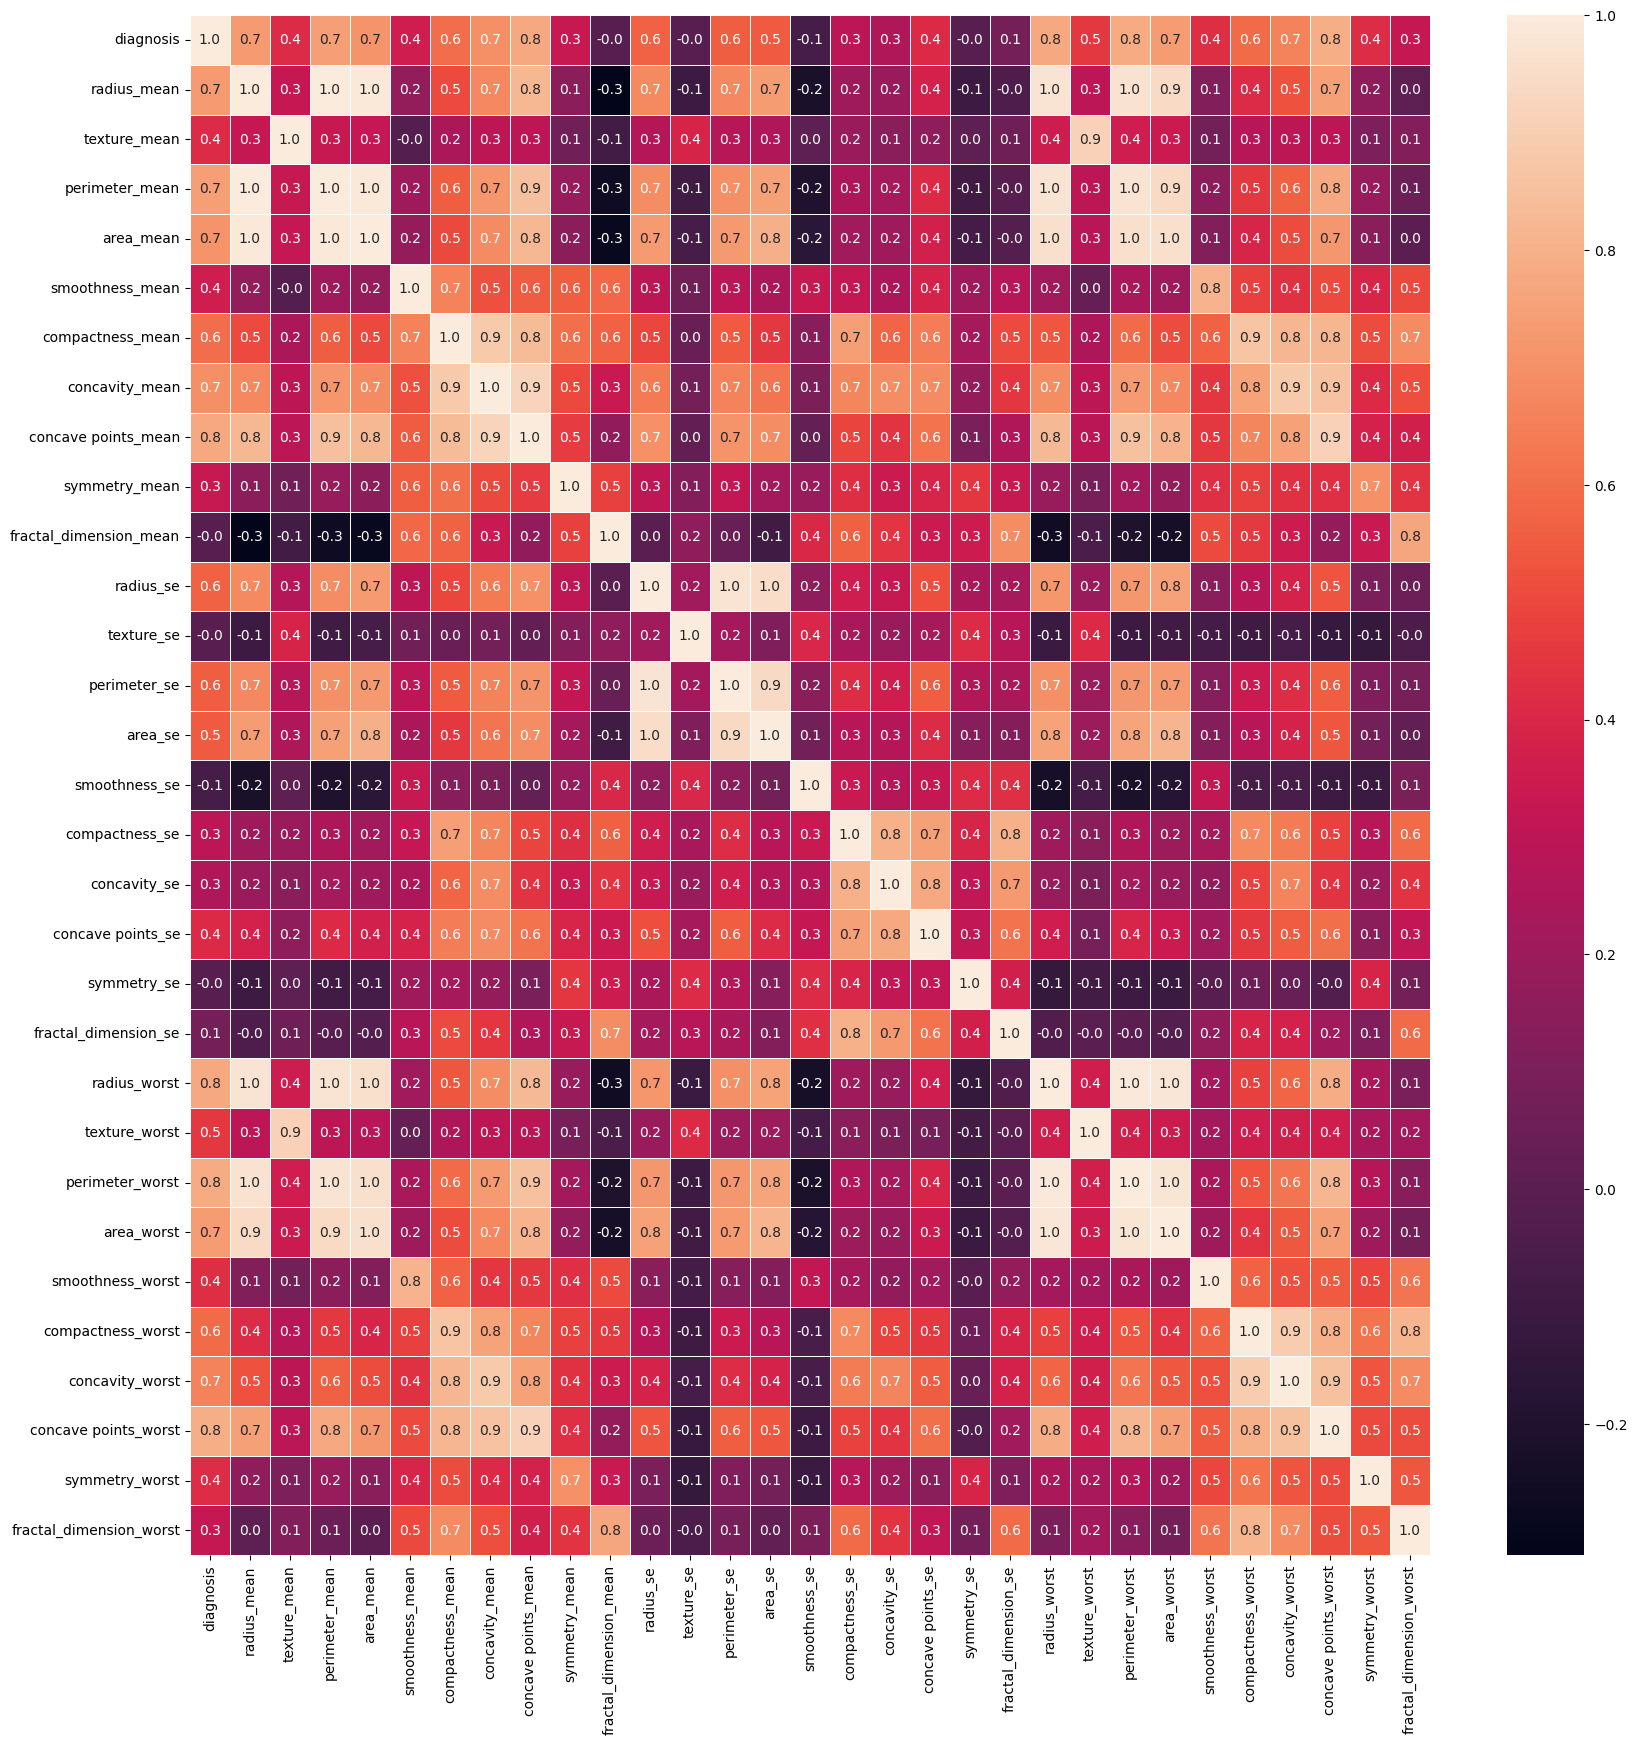

In [15]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [16]:
X=np.array(df.drop('diagnosis',axis=1))
Y=np.array(df.diagnosis)
scaler= StandardScaler()
X=scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=34)

In [18]:
cancer_model = tf.keras.Sequential([
  layers.Dense(24,activation='relu'),
  layers.Dense(8,activation='relu'),
  layers.Dense(16,activation='relu'),
  layers.Dense(64,activation='relu'),
  layers.Dense(16,activation='relu'),
  layers.Dense(8,activation='relu'),
  layers.Dense(1,activation='sigmoid')
])

In [19]:
cancer_model.compile(loss = 'binary_crossentropy',optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),metrics=['accuracy'])

In [20]:


early=EarlyStopping(monitor='val_loss',mode='min',patience=20)



In [21]:
cancer_model.fit(X_train, Y_train, epochs=1000, validation_data=(X_test,Y_test),callbacks=[early])

Epoch 1/1000
14/14 [==============================] - 3s 33ms/step - loss: 0.6039 - accuracy: 0.6174 - val_loss: 0.5439 - val_accuracy: 0.6573
Epoch 2/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.5260 - accuracy: 0.6174 - val_loss: 0.4728 - val_accuracy: 0.6573
Epoch 3/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.4627 - accuracy: 0.6244 - val_loss: 0.4139 - val_accuracy: 0.6923
Epoch 4/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.4143 - accuracy: 0.7066 - val_loss: 0.3734 - val_accuracy: 0.7972
Epoch 5/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.3841 - accuracy: 0.8286 - val_loss: 0.3449 - val_accuracy: 0.9021
Epoch 6/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.3628 - accuracy: 0.8873 - val_loss: 0.3284 - val_accuracy: 0.9371
Epoch 7/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.3469 - accuracy: 0.9038 - val_loss: 0.3163 - val_accuracy: 0.9371
Epoch

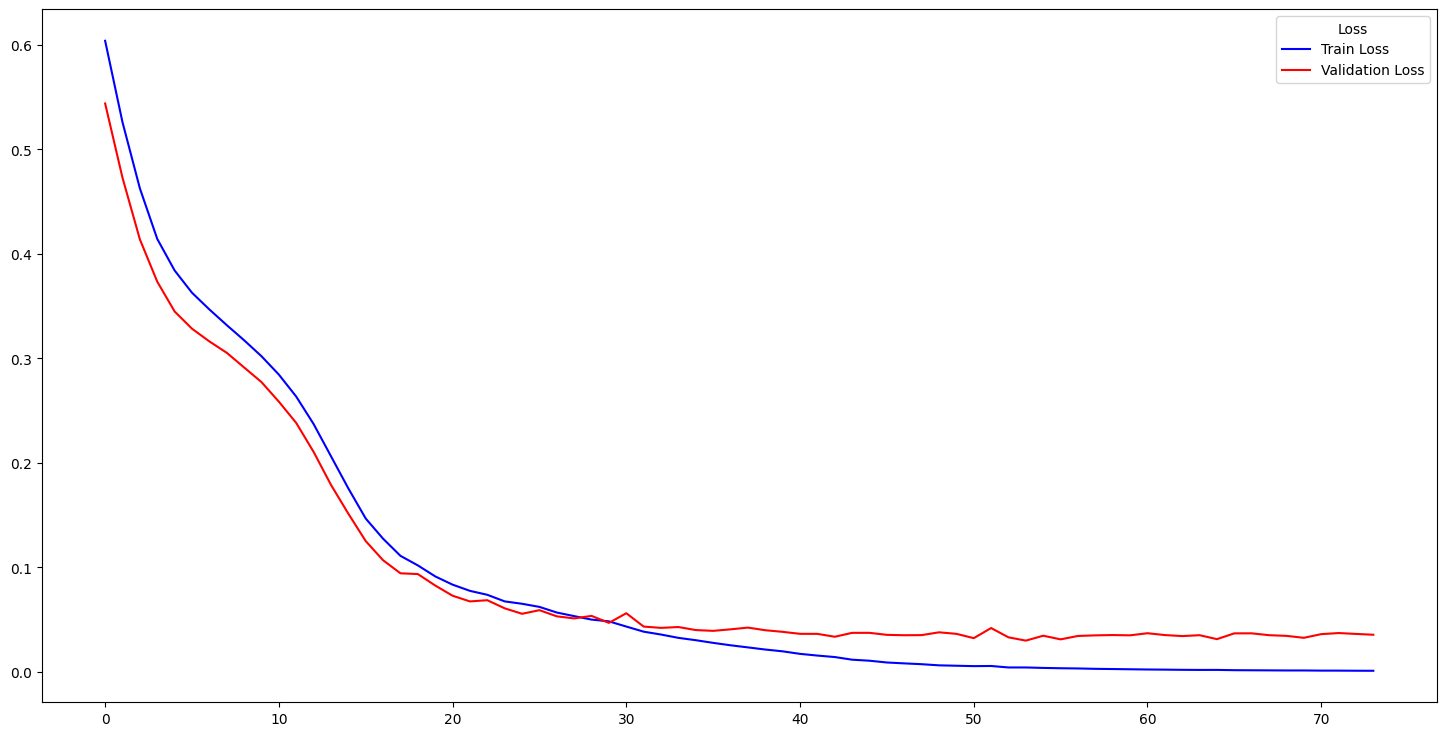

In [22]:
fig= plt.subplots(1, 1, figsize=(18, 9))
plt.plot(list(cancer_model.history.history['loss']),color='blue', label='Train Loss')
plt.plot(list(cancer_model.history.history['val_loss']),color='red', label='Validation Loss')
plt.legend(title='Loss')
plt.show()

In [23]:
predict=cancer_model.predict(X_test)
predict = np.array([ 1 if pred >=0.5 else 0 for pred in predict])
print(' pred ', predict)
print('--------------')
print('actual', Y_test)
print('--------------')
print('accuracy', accuracy_score(Y_test,predict))
print('--------------')
print(confusion_matrix(Y_test,predict))

5/5 [==============================] - 0s 2ms/step
 pred  [1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1]
--------------
actual [1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1]
--------------
accuracy 0.9790209790209791
--------------
[[91  3]
 [ 0 49]]
